<a href="https://colab.research.google.com/github/Roniakash/GeoAI_new/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geoai-py


In [ ]:
import leafmap
import geoai
from geoai.download import (
    download_naip,
    download_overture_buildings,
    extract_building_stats,
)

In [ ]:
m = leafmap.Map(center=[22.5726, 88.3639], zoom=12, draw_control=True, measure_control=True, attribution_control=True)
m.add_basemap("OpenStreetMap")
m

OpenStreetMap has been already added before.


Map(center=[22.5726, 88.3639], controls=(AttributionControl(options=['position', 'prefix'], position='bottomri…

In [ ]:
bbox = m.user_roi_bounds()


In [ ]:
print(bbox)

[88.381, 22.5851, 88.3882, 22.5889]


In [ ]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357"

In [ ]:
bands_to_download = [
    "B02","B03","B04","B08",  # True color + NIR
    "B05","B06","B07","B11","B12"  # Vegetation, water, SWIR
]

In [ ]:
output_directory = "kolkata_sentinel2"

In [ ]:
downloaded_bands = geoai.download_pc_stac_item(
    item_url=item_url,
    bands=bands_to_download,
    output_dir=output_directory,
    show_progress=True,
    merge_bands=True,
    merged_filename="kolkata_sentinel2.tif",
    cell_size=10
)

File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B02.tif already exists, skipping (use overwrite=True to force download).
File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B03.tif already exists, skipping (use overwrite=True to force download).
File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B04.tif already exists, skipping (use overwrite=True to force download).
File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B08.tif already exists, skipping (use overwrite=True to force download).
File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B05.tif already exists, skipping (use overwrite=True to force download).
File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B06.tif already exists, skipping (use overwrite=True to force download).
File kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B07.tif already 

In [ ]:
for band, path in downloaded_bands.items():
    print(f"Downloaded {band}: {path}")

Downloaded B02: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B02.tif
Downloaded B03: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B03.tif
Downloaded B04: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B04.tif
Downloaded B08: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B08.tif
Downloaded B05: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B05.tif
Downloaded B06: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B06.tif
Downloaded B07: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B07.tif
Downloaded B11: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B11.tif
Downloaded B12: kolkata_sentinel2/S2B_MSIL2A_20230228T043729_R033_T45QXE_20230301T185357_B12.tif
Downloaded merged: kolkata_sentinel2/kolkata_sentinel2.tif


In [ ]:
raster_url = "/content/kolkata_sentinel2/kolkata_sentinel2.tif"

In [ ]:
geoai.view_raster(raster_url, bidx=[8, 3, 2], rescale="1000,4000")  # RGB


In [ ]:
from geoai import download_overture_buildings

In [ ]:
data_file = download_overture_buildings(
    bbox=bbox,
    output="kolkata_buildings.geojson"
)

print("Saved to:", data_file)

Saved to:                                         id  \
0     ed376bd0-b10e-4ca8-b406-f4e54d12a36b   
1     9f50b722-90e3-48be-af08-61ea3928b84e   
2     168479a1-4ecc-4468-9025-ed3e27d7c88b   
3     f2e46c51-4617-4e33-9354-911620984d25   
4     e2819ffb-a8da-4030-a8ee-56c77ad618c1   
...                                    ...   
1011  13a3e53c-a2c7-4318-b758-a9712421c2f6   
1012  20974235-1f7b-4dda-a43c-5885750b3b22   
1013  33d27adf-a668-4909-ab04-efcd0dc22b18   
1014  df4b06be-d5e9-4808-89d6-0f86623d767b   
1015  f4408a75-cf28-43b8-b41a-dce1b64b78ad   

                                               geometry  \
0     POLYGON ((88.38107 22.58511, 88.3811 22.5851, ...   
1     POLYGON ((88.38116 22.58509, 88.38117 22.58512...   
2     POLYGON ((88.38129 22.58507, 88.38131 22.58511...   
3     POLYGON ((88.38136 22.5851, 88.38131 22.58511,...   
4     POLYGON ((88.38209 22.58505, 88.38212 22.58511...   
...                                                 ...   
1011  POLYGON ((88.38791

<Axes: >

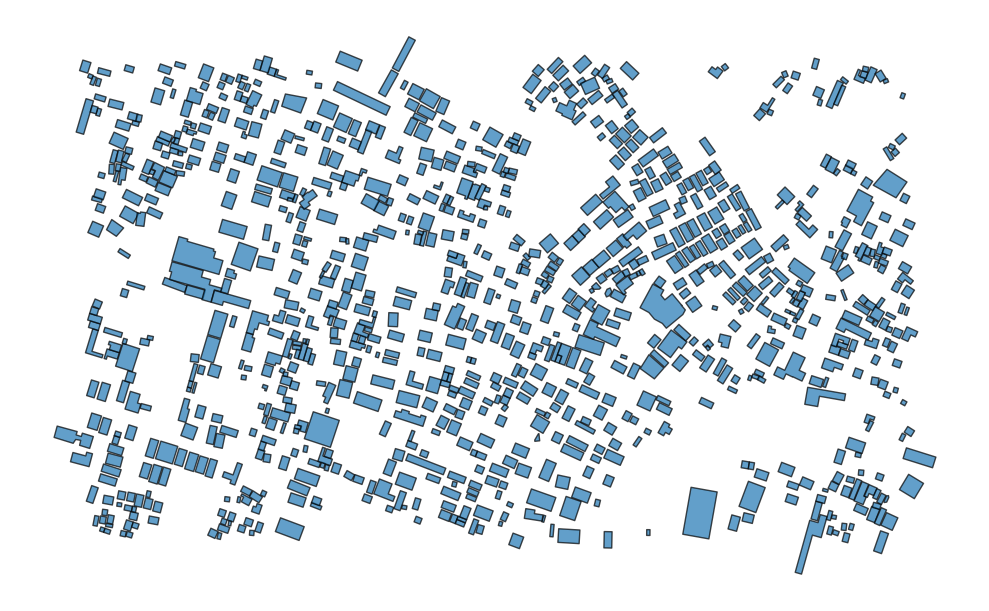

In [ ]:
geoai.view_vector(data_file)


In [ ]:
status = extract_building_stats(data_file)
print(status)


{'total_buildings': 1016, 'has_height': 0, 'has_name': 0, 'bbox': [88.3806638, 22.5847612, 88.3884852, 22.5891615]}


In [ ]:
m.add_geojson(
    "kolkata_buildings.geojson",
    layer_name="Buildings by Height",
    style={"color": "blue", "fillOpacity": 0.5},
    info_mode="on_hover"
)


In [ ]:
m

Map(bottom=14615546.0, center=[22.586617253996224, 88.38468014020002], controls=(AttributionControl(options=['…